# Using Machine Learning Tools 2021, Assignment 3

## Sign Language Image Classification using Deep Learning

## Overview

In this assignment you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore over-fitting and know what appropriate actions to take in these cases.
 

It is the intention that this assignment will take you through the process of implementing and optimising deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, optimize performance and present results. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.


## Scenario

A client is interested in having you (or rather the company that you work for) investigate whether it is possible to develop an app that would enable American sign language to be translated for people that do not sign, or those that sign in different languages/styles. They have provided you with a labelled data of images related to signs (hand positions) that represent individual letters in order to do a preliminary test of feasibility.

Your manager has asked you to do this feasibility assessment, but subject to a constraint on the computational facilities available.  More specifically, you are asked to do **no more than 50 training runs in total** (including all models and hyperparameter settings that you consider).  

In addition, you are told to **create a validation set and any necessary test sets using _only_ the supplied testing dataset.** It is unusual to do this, but here the training set contains a lot of non-independent, augmented images and it is important that the validation images must be totally independent of the training data and not made from augmented instances of training images.

The clients have asked to be informed about the following:
 - **unbiased accuracy** estimate of a deep learning model (since DL models are fast when deployed)
 - the letter with the lowest individual accuracy
 - the most common error (of one letter being incorrectly labelled as another)
 
Your manager has asked you to create a jupyter notebook that shows the following:
 - loading the data, checking it, fixing any problems, and displaying a sample
 - training and optimising both **densely connected** *and* **CNN** style models
 - finding the best one, subject to a rapid turn-around and corresponding limit of 50 training runs in total
 - reporting clearly what networks you have tried, the method you used to optimise them, the associated learning curves, their summary performance and selection process to pick the best model
     - this should be clear enough that another employee, with your skillset, should be able to take over from you and understand your methods
 - results from the model that is selected as the best, showing the information that the clients have requested
 - a statistical test between the best and second-best models, to see if there is any significant difference in performance (overall accuracy)
 - it is hoped that the accuracy will exceed 96% overall and better than 90% for every individual letter, and you are asked to:
     - report the overall accuracy
     - report the accuracy for each individual letter
     - write a short recommendation regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation


## Guide to Assessment

This assignment is much more free-form than others in order to test your ability to run a full analysis like this one from beginning to end, using the correct procedures. So you should use a methodical approach, as a large portion of the marks are associated with the decisions that you take and the approach that you use.  There are no marks associated with the performance - just report what you achieve, as high performance does not get better marks - to get good marks you need to use the right steps, as you've used in other assignments and workshops.

Make sure that you follow the instructions found in the scenario above, as this is what will be marked.  And be careful to do things in a way that gives you an *unbiased* result.

The notebook that you submit should be similar to those in the other assignments, where it is important to clearly structure your outputs and code so that it could be understood by your manager or your co-worker - or, even more importantly, the person marking it! This does not require much writing, beyond the code, comments and the small amount that you've seen in previous assignments.  Do not write long paragraphs to explain every detail of everything you do - it is not that kind of report and longer is definitely not better.  Just make your code clear, your outputs easy to understand (short summaries often help here), and include a few small markdown cells that describe or summarise things when necessary.

Marks for the assignment will be determined according to the general rubric that you can find on MyUni, with a breakdown into sections as follows:
 - 10%: Loading, investigating, manipulating and displaying data
 - 20%: Initial model successfully trained (and acting as a baseline)
 - 45%: Optimisation of an appropriate set of models in an appropriate way (given the constraint of 50 training runs)
 - 25%: Comparison of models, selection of the best two and reporting of final results

Remember that most marks will be for the **steps you take**, rather than the achievement of any particular results. There will also be marks for showing appropriate understanding of the results that you present.  

What you need to do this assignment can all be found in the first 10 weeks of workshops, lectures and also the previous two assignments. The one exception to this is the statistical test, which will be covered in week 11.

## Final Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis. 
- Your code must use the current stable versions of python libraries, not outdated versions.
- All data processing must be done within the notebook after calling appropriate load functions.
- Comment your code, so that its purpose is clear to the reader!
- In the submission file name, do not use spaces or special characters.

The marks for this assignment are mainly associated with making the right choices and executing the workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from sklearn, pandas, matplotlib and keras, as presented in the workshops. Other high-level libraries should not be used, even though they might have nice functionality such as automated hyperparameter or architecture search/tuning/optimisation. For the deep learning parts please restrict yourself to the library calls used in workshops 7-10 or ones that are very similar to these. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

As ususal, feel free to use code from the workshops as a base for this assignment but be aware that they will normally not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications.

The assignment is worth 35% of your overall mark for the course.

Mark Jenkinson  
May 2022

# Loading, investigating, manipulating and displaying data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#read file and get initial view of the data
train_set = pd.read_csv('sign_mnist_train.csv')
big_test_set= pd.read_csv('sign_mnist_test.csv')
print(train_set.info())
print(big_test_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB
None


In [2]:
print(train_set.describe())
print(big_test_set.describe())
'''We see there is an outlier in the train set''' 

              label        pixel1        pixel2        pixel3        pixel4  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean      12.325369    145.419377    148.500273    151.247714    153.546531   
std        7.374907     41.358555     39.942152     39.056286     38.595247   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000    121.000000    126.000000    130.000000    133.000000   
50%       13.000000    150.000000    153.000000    156.000000    158.000000   
75%       19.000000    174.000000    176.000000    178.000000    179.000000   
max      200.000000    255.000000    255.000000    255.000000    255.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean     156.210891    158.411255    160.472154    162.339683    163.954799   
std       37.111165     36.125579     35.016392    

'We see there is an outlier in the train set'

In [3]:
train_set = train_set[train_set['label'] != 200]

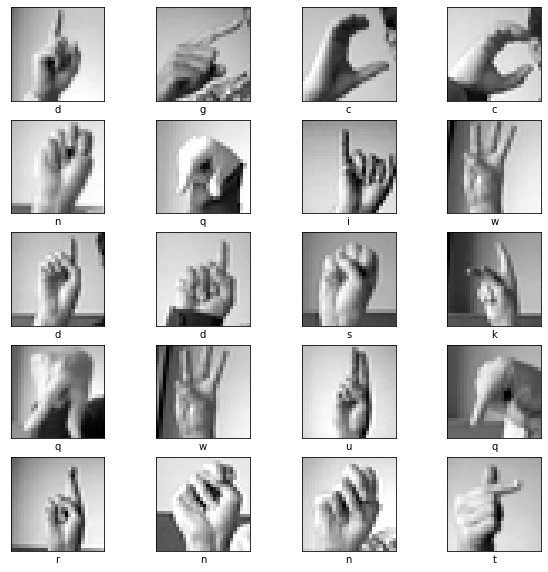

In [4]:
#graph the first serveral images in train_set to get init view of the signs

#reshape the data into 28*28 bitmap
bitmap_values = train_set.drop(['label'], axis=1).values.reshape(-1,28,28)
labels = train_set['label'].values
#print(bitmap_value)
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.grid(False)
    plt.imshow(bitmap_values[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(chr(labels[i]+ord('a')))

plt.show()

In [5]:
# y_train.describe()

# val test split

In [6]:
from sklearn.model_selection import train_test_split
val_set, test_set = train_test_split(big_test_set, test_size=0.2, random_state=42, stratify=big_test_set['label'])



X_train = np.array(train_set)[:,1:]
y_train = np.array(train_set)[:,0]
X_val = np.array(val_set)[:,1:]
y_val = np.array(val_set)[:,0]
X_test = np.array(test_set)[:,1:]
y_test = np.array(test_set)[:,0]


In [7]:
print(y_val.shape)

(5737,)


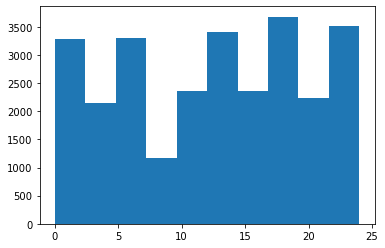

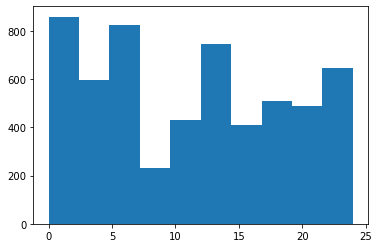

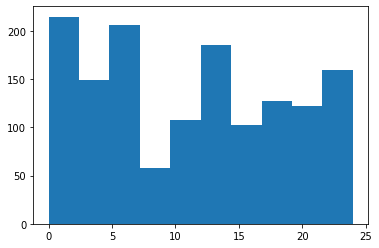

In [8]:
#looke at the destribution for the 3 sets
plt.hist(y_train)
plt.show()
plt.hist(y_val)
plt.show()
plt.hist(y_test)
plt.show()

# Train Initial model

In [9]:
print(X_train.shape) #we need to reshape X sets

(27454, 784)


In [10]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)/255.0
X_val=X_val.reshape(X_val.shape[0],28,28,1)/255.0
X_test=X_test.reshape(X_test.shape[0],28,28,1)/255.0

In [11]:
print(X_train.shape) #now it's reshaped

(27454, 28, 28, 1)


In [12]:
import keras
# Some key parameters
n_train = 300
n_valid = 100
hiddensizes = [16, 32, 16]
actfn = "elu"
# Optimiser and learning rate
optimizer = keras.optimizers.SGD
learningrate = 0.01   
batch_size = 32
n_epochs = 10

### make helper functions

In [13]:
def plot_history(history):
    # Plot the results (shifting validation curves appropriately)
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
    plt.xlabel('Epochs')
    plt.show() 

### CNN

In [14]:
#i use the same model sections as workshop 10
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate=0):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(hiddensizes[0],(3,3), activation=actfn, input_shape=(28,28,1)))    
    model.add(keras.layers.MaxPooling2D(2,2))       
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(n,(3,3), activation=actfn,))  
        model.add(keras.layers.MaxPooling2D(2,2))         
    model.add(keras.layers.Flatten())                         
    model.add(keras.layers.Dense(256,activation=actfn))
    model.add(keras.layers.Dense(128,activation=actfn))
    model.add(keras.layers.Dense(26,activation="softmax")) 
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    return model

In [15]:
def do_all_cnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, further_callbacks=[]):
    early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=5, 
                                                  restore_best_weights=True) 
    model = model_cnn_factory(hiddensizes, actfn, optimizer, learningrate)
    callbacks = [early_stopping_cb]
    history = model.fit(X_train, y_train, epochs=n_epochs, callbacks = [early_stopping_cb],
                            validation_data=(X_val, y_val))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

In [16]:
valacc, history, model = do_all_cnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
# model.summary()
# model.fit(X_train, y_train, epochs=n_epochs,
#                             validation_data=(X_val, y_val))

Epoch 1/10
858/858 [==============================] - 20s 23ms/step - loss: 2.6934 - accuracy: 0.2149 - val_loss: 1.9350 - val_accuracy: 0.3941
Epoch 2/10
858/858 [==============================] - 19s 22ms/step - loss: 1.1791 - accuracy: 0.6441 - val_loss: 1.0654 - val_accuracy: 0.6625
Epoch 3/10
858/858 [==============================] - 19s 22ms/step - loss: 0.5401 - accuracy: 0.8416 - val_loss: 0.6748 - val_accuracy: 0.7642
Epoch 4/10
858/858 [==============================] - 19s 22ms/step - loss: 0.2446 - accuracy: 0.9367 - val_loss: 0.4980 - val_accuracy: 0.8395
Epoch 5/10
858/858 [==============================] - 19s 22ms/step - loss: 0.1044 - accuracy: 0.9816 - val_loss: 0.4442 - val_accuracy: 0.8506
Epoch 6/10
858/858 [==============================] - 19s 22ms/step - loss: 0.0484 - accuracy: 0.9947 - val_loss: 0.4374 - val_accuracy: 0.8613
Epoch 7/10
858/858 [==============================] - 19s 22ms/step - loss: 0.0255 - accuracy: 0.9983 - val_loss: 0.4351 - val_accuracy:

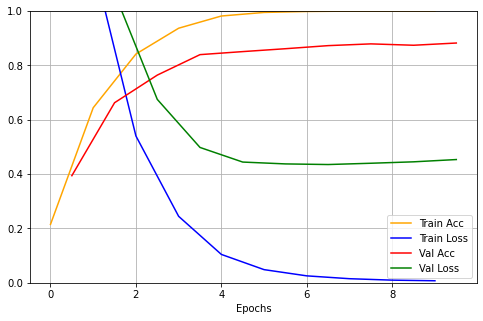

In [17]:
plot_history(history)

In [18]:
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss : ", score[0])
print("Test Accuracy : ", score[1])

Test Loss :  0.4337109625339508
Test Accuracy :  0.8857142925262451


### densely connected

In [19]:
def model_dense_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28, 28, 1)))
    model.add(keras.layers.Dense(256,activation=actfn))
    model.add(keras.layers.Dense(128,activation=actfn))
    model.add(keras.layers.Dense(26,activation="softmax"))    
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

In [20]:
def do_all_dense(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, further_callbacks=[]):
    early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=5, 
                                                  restore_best_weights=True) 
    model = model_dense_factory(hiddensizes, actfn, optimizer, learningrate)
    callbacks = [early_stopping_cb]
    history = model.fit(X_train, y_train, epochs=n_epochs, callbacks = [early_stopping_cb],
                            validation_data=(X_val, y_val))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

In [21]:
valacc, history, model = do_all_dense(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
model.summary()

Epoch 1/10
858/858 [==============================] - 6s 6ms/step - loss: 2.3443 - accuracy: 0.3378 - val_loss: 1.8782 - val_accuracy: 0.3964
Epoch 2/10
858/858 [==============================] - 5s 6ms/step - loss: 1.4068 - accuracy: 0.5956 - val_loss: 1.4086 - val_accuracy: 0.5703
Epoch 3/10
858/858 [==============================] - 5s 6ms/step - loss: 1.0551 - accuracy: 0.6898 - val_loss: 1.2972 - val_accuracy: 0.6094
Epoch 4/10
858/858 [==============================] - 5s 6ms/step - loss: 0.8585 - accuracy: 0.7470 - val_loss: 1.1465 - val_accuracy: 0.6488
Epoch 5/10
858/858 [==============================] - 5s 6ms/step - loss: 0.7280 - accuracy: 0.7838 - val_loss: 1.1496 - val_accuracy: 0.6280
Epoch 6/10
858/858 [==============================] - 5s 6ms/step - loss: 0.6203 - accuracy: 0.8189 - val_loss: 1.0159 - val_accuracy: 0.6781
Epoch 7/10
858/858 [==============================] - 5s 6ms/step - loss: 0.5418 - accuracy: 0.8396 - val_loss: 0.9455 - val_accuracy: 0.7011
Epoch 

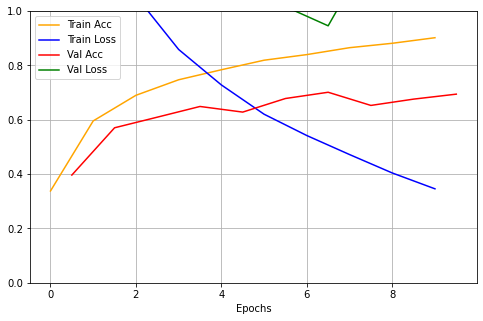

In [22]:
plot_history(history)

In [23]:
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss : ", score[0])
print("Test Accuracy : ", score[1])

Test Loss :  1.1009924411773682
Test Accuracy :  0.687108039855957


For this two initial models, the cnn model is better than the dense model

# Optimize models

### CNN model

In [24]:
max_valacc = 0

for learning_rate in [0.001,0.01]:
    for optimizer in [keras.optimizers.SGD,keras.optimizers.Nadam]:
        for acfn in ['relu','selu',"sigmoid"]:
            valacc, history, model = do_all_cnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
            if valacc > max_valacc:
                max_valacc = valacc
                max_learning_rate = learning_rate
                max_optimizer = optimizer
                max_acfn = acfn
                best_history = history
                

Epoch 1/10
858/858 [==============================] - 20s 22ms/step - loss: 2.8429 - accuracy: 0.2113 - val_loss: 2.0440 - val_accuracy: 0.3983
Epoch 2/10
858/858 [==============================] - 18s 21ms/step - loss: 1.1540 - accuracy: 0.6693 - val_loss: 0.9003 - val_accuracy: 0.6920
Epoch 3/10
858/858 [==============================] - 18s 21ms/step - loss: 0.4679 - accuracy: 0.8651 - val_loss: 0.6016 - val_accuracy: 0.7873
Epoch 4/10
858/858 [==============================] - 18s 21ms/step - loss: 0.2098 - accuracy: 0.9457 - val_loss: 0.4775 - val_accuracy: 0.8429
Epoch 5/10
858/858 [==============================] - 18s 21ms/step - loss: 0.0915 - accuracy: 0.9844 - val_loss: 0.3983 - val_accuracy: 0.8780
Epoch 6/10
858/858 [==============================] - 18s 21ms/step - loss: 0.0441 - accuracy: 0.9954 - val_loss: 0.4077 - val_accuracy: 0.8790
Epoch 7/10
858/858 [==============================] - 18s 21ms/step - loss: 0.0243 - accuracy: 0.9989 - val_loss: 0.4209 - val_accuracy:

Epoch 7/10
858/858 [==============================] - 18s 21ms/step - loss: 0.0226 - accuracy: 0.9991 - val_loss: 0.4614 - val_accuracy: 0.8801
Epoch 8/10
858/858 [==============================] - 18s 21ms/step - loss: 0.0134 - accuracy: 0.9999 - val_loss: 0.4706 - val_accuracy: 0.8785
Epoch 9/10
858/858 [==============================] - 18s 21ms/step - loss: 0.0096 - accuracy: 0.9999 - val_loss: 0.4783 - val_accuracy: 0.8790
Epoch 10/10
858/858 [==============================] - 18s 21ms/step - loss: 0.0071 - accuracy: 0.9999 - val_loss: 0.4997 - val_accuracy: 0.8796
Epoch 1/10
858/858 [==============================] - 20s 22ms/step - loss: 2.7031 - accuracy: 0.2158 - val_loss: 1.8774 - val_accuracy: 0.4265
Epoch 2/10
858/858 [==============================] - 18s 21ms/step - loss: 1.1368 - accuracy: 0.6628 - val_loss: 0.9380 - val_accuracy: 0.6958
Epoch 3/10
858/858 [==============================] - 18s 21ms/step - loss: 0.4840 - accuracy: 0.8615 - val_loss: 0.6206 - val_accuracy

In [25]:
print(f'the max val accurency after trained is {max_valacc} with the model: max_learning_rate: {max_learning_rate}, max_optimizer: {max_optimizer}, max_acfn: {max_acfn}')


the max val accurency after trained is 0.939341127872467 with the model: max_learning_rate: 0.01, max_optimizer: <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, max_acfn: sigmoid


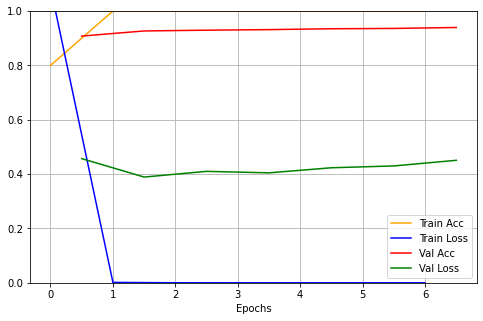

In [26]:
#look at the graph
plot_history(best_history)

### dense model

In [27]:
max_valacc = 0

for learning_rate in [0.001,0.01]:
    for optimizer in [keras.optimizers.SGD,keras.optimizers.Nadam]:
        for acfn in ['relu','selu']:
            valacc, history, model = do_all_dense(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
            if valacc > max_valacc:
                max_valacc = valacc
                max_learning_rate = learning_rate
                max_optimizer = optimizer
                max_acfn = acfn
                best_history = history

Epoch 1/10
858/858 [==============================] - 6s 6ms/step - loss: 2.3733 - accuracy: 0.3364 - val_loss: 1.8917 - val_accuracy: 0.4060
Epoch 2/10
858/858 [==============================] - 5s 6ms/step - loss: 1.4246 - accuracy: 0.5849 - val_loss: 1.4399 - val_accuracy: 0.5510
Epoch 3/10
858/858 [==============================] - 5s 6ms/step - loss: 1.0733 - accuracy: 0.6810 - val_loss: 1.2838 - val_accuracy: 0.5937
Epoch 4/10
858/858 [==============================] - 5s 6ms/step - loss: 0.8766 - accuracy: 0.7394 - val_loss: 1.2215 - val_accuracy: 0.6244
Epoch 5/10
858/858 [==============================] - 5s 6ms/step - loss: 0.7460 - accuracy: 0.7758 - val_loss: 1.0498 - val_accuracy: 0.6751
Epoch 6/10
858/858 [==============================] - 5s 6ms/step - loss: 0.6457 - accuracy: 0.8095 - val_loss: 1.0707 - val_accuracy: 0.6775
Epoch 7/10
858/858 [==============================] - 5s 6ms/step - loss: 0.5581 - accuracy: 0.8381 - val_loss: 1.0237 - val_accuracy: 0.6821
Epoch 

858/858 [==============================] - 5s 6ms/step - loss: 0.4930 - accuracy: 0.8526 - val_loss: 1.0498 - val_accuracy: 0.6847
Epoch 9/10
858/858 [==============================] - 5s 6ms/step - loss: 0.4417 - accuracy: 0.8702 - val_loss: 1.0330 - val_accuracy: 0.6744
Epoch 10/10
858/858 [==============================] - 5s 6ms/step - loss: 0.3740 - accuracy: 0.8924 - val_loss: 1.0108 - val_accuracy: 0.6953
Epoch 1/10
858/858 [==============================] - 8s 8ms/step - loss: 3.0879 - accuracy: 0.1073 - val_loss: 2.8182 - val_accuracy: 0.1604
Epoch 2/10
858/858 [==============================] - 7s 8ms/step - loss: 2.2208 - accuracy: 0.2569 - val_loss: 1.9907 - val_accuracy: 0.3504
Epoch 3/10
858/858 [==============================] - 7s 8ms/step - loss: 1.8192 - accuracy: 0.3798 - val_loss: 1.8315 - val_accuracy: 0.4096
Epoch 4/10
858/858 [==============================] - 7s 8ms/step - loss: 1.5343 - accuracy: 0.4737 - val_loss: 1.6423 - val_accuracy: 0.4860
Epoch 5/10
858/8

In [28]:
print(f'the max val accurency after trained is {max_valacc} with the model: max_learning_rate: {max_learning_rate}, max_optimizer: {max_optimizer}, max_acfn: {max_acfn}')

the max val accurency after trained is 0.7125675678253174 with the model: max_learning_rate: 0.001, max_optimizer: <class 'keras.optimizers.optimizer_v2.gradient_descent.SGD'>, max_acfn: relu


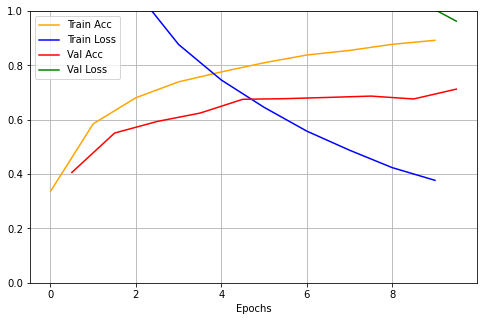

In [29]:
#look at the graph
plot_history(best_history)

# Comparison of models, selection

## for cnn

In [30]:
# we use the test set to see the performance
actfn = 'selu'
optimizer = keras.optimizers.Nadam
learningrate = 0.001
valacc, history, model = do_all_cnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)

Epoch 1/10
858/858 [==============================] - 23s 24ms/step - loss: 0.3503 - accuracy: 0.9059 - val_loss: 0.3516 - val_accuracy: 0.8963
Epoch 2/10
858/858 [==============================] - 20s 23ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.3882 - val_accuracy: 0.9078
Epoch 3/10
858/858 [==============================] - 20s 23ms/step - loss: 0.2465 - accuracy: 0.9757 - val_loss: 0.4697 - val_accuracy: 0.8883
Epoch 4/10
858/858 [==============================] - 20s 23ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4687 - val_accuracy: 0.8975
Epoch 5/10
858/858 [==============================] - 20s 23ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4941 - val_accuracy: 0.8940
Epoch 6/10
858/858 [==============================] - 20s 23ms/step - loss: 5.4830e-04 - accuracy: 1.0000 - val_loss: 0.4834 - val_accuracy: 0.9008


In [31]:
print(f'the max validation accurrency for cnn is {valacc}')

the max validation accurrency for cnn is 0.9077915549278259


In [32]:
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss : ", score[0])
print("Test Accuracy : ", score[1])

Test Loss :  0.3926527798175812
Test Accuracy :  0.889895498752594


### for dense

In [33]:
# we use the test set to see the performance
actfn = 'selu'
optimizer = keras.optimizers.SGD
learningrate = 0.01
valacc, history, model = do_all_dense(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)

Epoch 1/10
858/858 [==============================] - 6s 6ms/step - loss: 2.0139 - accuracy: 0.4039 - val_loss: 1.5963 - val_accuracy: 0.5175
Epoch 2/10
858/858 [==============================] - 5s 6ms/step - loss: 1.1478 - accuracy: 0.6533 - val_loss: 1.7335 - val_accuracy: 0.5093
Epoch 3/10
858/858 [==============================] - 5s 6ms/step - loss: 0.8749 - accuracy: 0.7383 - val_loss: 1.1639 - val_accuracy: 0.6347
Epoch 4/10
858/858 [==============================] - 5s 6ms/step - loss: 0.7227 - accuracy: 0.7808 - val_loss: 1.1705 - val_accuracy: 0.6329
Epoch 5/10
858/858 [==============================] - 5s 6ms/step - loss: 0.5882 - accuracy: 0.8250 - val_loss: 1.0464 - val_accuracy: 0.6821
Epoch 6/10
858/858 [==============================] - 5s 6ms/step - loss: 0.4888 - accuracy: 0.8585 - val_loss: 1.0748 - val_accuracy: 0.7056
Epoch 7/10
858/858 [==============================] - 5s 6ms/step - loss: 0.4057 - accuracy: 0.8825 - val_loss: 1.0408 - val_accuracy: 0.6986
Epoch 

In [34]:
print(f'the max validation accurrency for dense is {valacc}')

the max validation accurrency for dense is 0.725640594959259


In [35]:
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss : ", score[0])
print("Test Accuracy : ", score[1])

Test Loss :  1.0389772653579712
Test Accuracy :  0.7114982604980469


In [36]:
'''the cnn model with  actfn = 'selu', optimizer =keras.optimizers.Nadam, learningrate =0.01 tested to be the best model''' 

"the cnn model with  actfn = 'selu', optimizer =keras.optimizers.Nadam, learningrate =0.01 tested to be the best model"